In [1]:
#libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

%matplotlib inline
sns.set()
#preprocess
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
#models
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from scipy.stats import randint as sp_randint
from sklearn.ensemble import BaggingClassifier,VotingClassifier, AdaBoostClassifier, StackingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
#check
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
#save
import pickle as pk

In [2]:
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [5]:
df.shape

(319795, 18)

# Explore Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

# Check Null Values

In [8]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
#all rows control for null values
df.isna().values.any()

False

In [10]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

# Duplicated values

In [11]:
df.duplicated().sum()

18078

In [12]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(301717, 18)

# Data Analysis & Visualization  using Seaborn Library, pyplot

<function matplotlib.pyplot.show(close=None, block=None)>

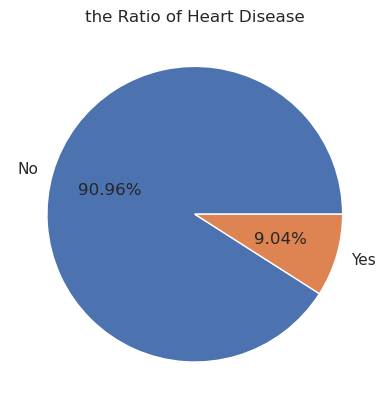

In [14]:
#show Ratio of HeartDisease from data
plt.pie(x = df['HeartDisease'].value_counts() ,autopct='%1.2f%%' ,labels=df['HeartDisease'].value_counts().index)
plt.title('the Ratio of Heart Disease')
plt.show

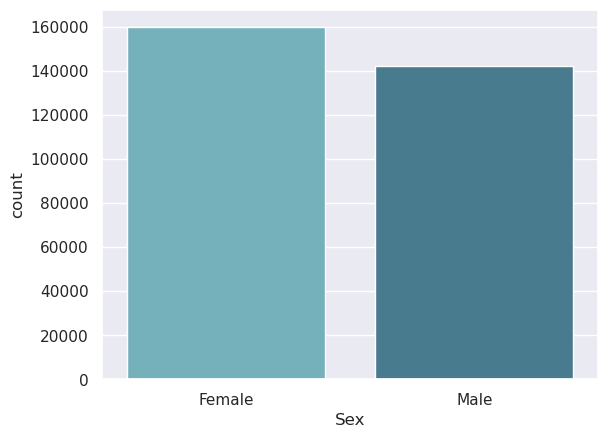

In [15]:
#show how many of Male and female 
sns.countplot(x = df['Sex'], palette='GnBu_d')
plt.show()

In [16]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex     HeartDisease
Female  No              148458
        Yes              11213
Male    No              125998
        Yes              16048
Name: HeartDisease, dtype: int64

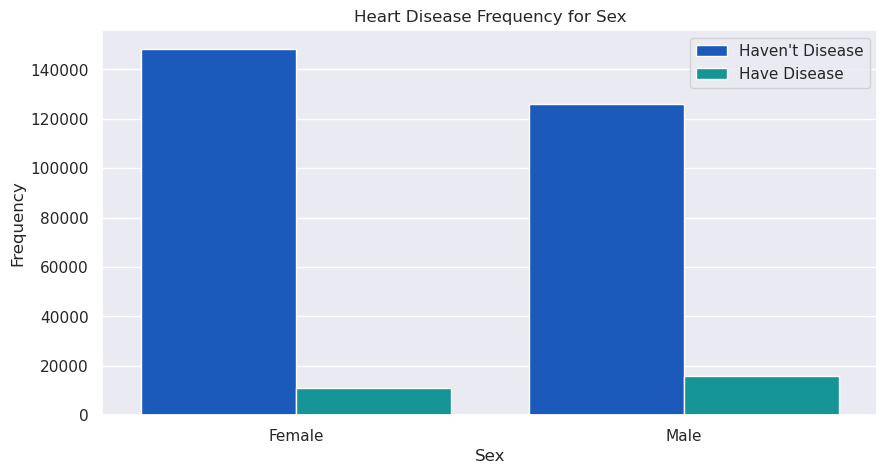

In [17]:
#show Heart Disease Frequency for Sex
plt.figure(figsize=(10,5))
sns.countplot(x = df['Sex'], data=df, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [18]:
#AgeCategory frequency
df['AgeCategory'].value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [19]:
df.groupby(['AgeCategory','HeartDisease'])['HeartDisease'].count()

AgeCategory  HeartDisease
18-24        No              19868
             Yes               130
25-29        No              16179
             Yes               133
30-34        No              17727
             Yes               226
35-39        No              19230
             Yes               296
40-44        No              19351
             Yes               486
45-49        No              19775
             Yes               743
50-54        No              22353
             Yes              1383
55-59        No              25411
             Yes              2199
60-64        No              27898
             Yes              3321
65-69        No              27596
             Yes              4074
70-74        No              24456
             Yes              4817
75-79        No              16686
             Yes              4027
80 or older  No              17926
             Yes              5426
Name: HeartDisease, dtype: int64

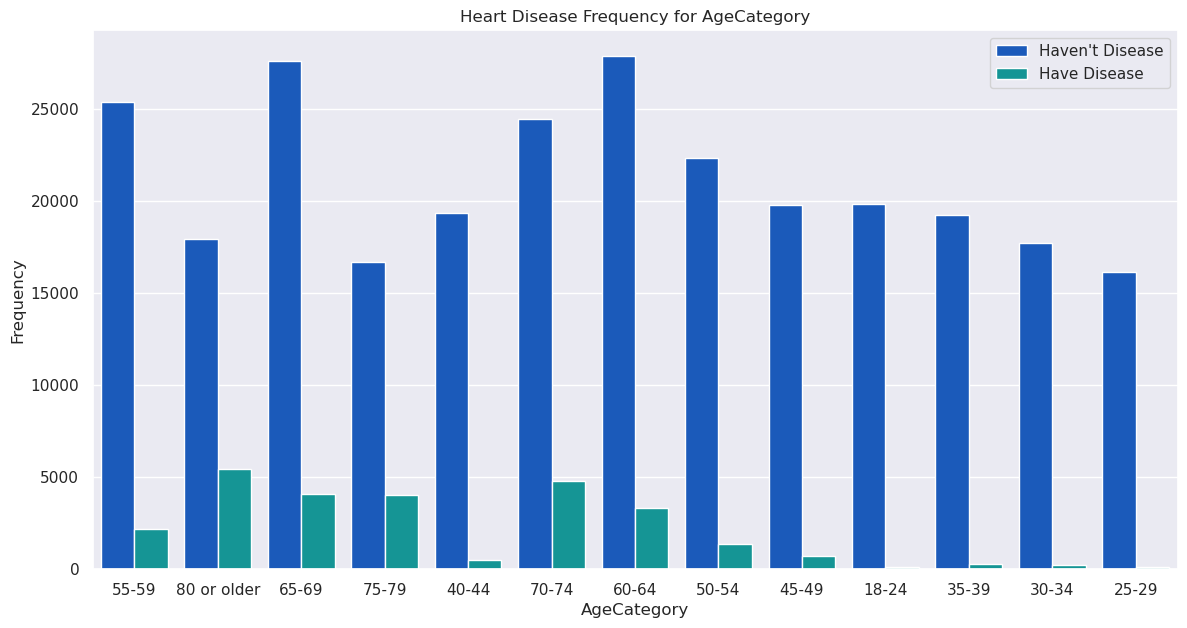

In [20]:
#show Heart Disease Frequency for AgeCategory
plt.figure(figsize=(14,7))
sns.countplot(x='AgeCategory', data=df, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [21]:
#the count of people Smoking
df['Smoking'].value_counts()

No     174312
Yes    127405
Name: Smoking, dtype: int64

In [22]:
df.groupby(['Sex','AgeCategory','Smoking','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  Smoking  HeartDisease
Female  18-24        No       No              7963
                              Yes               40
                     Yes      No              1132
                              Yes               10
        25-29        No       No              5746
                                              ... 
Male    75-79        Yes      Yes             1552
        80 or older  No       No              2905
                              Yes             1086
                     Yes      No              3512
                              Yes             1724
Name: HeartDisease, Length: 104, dtype: int64

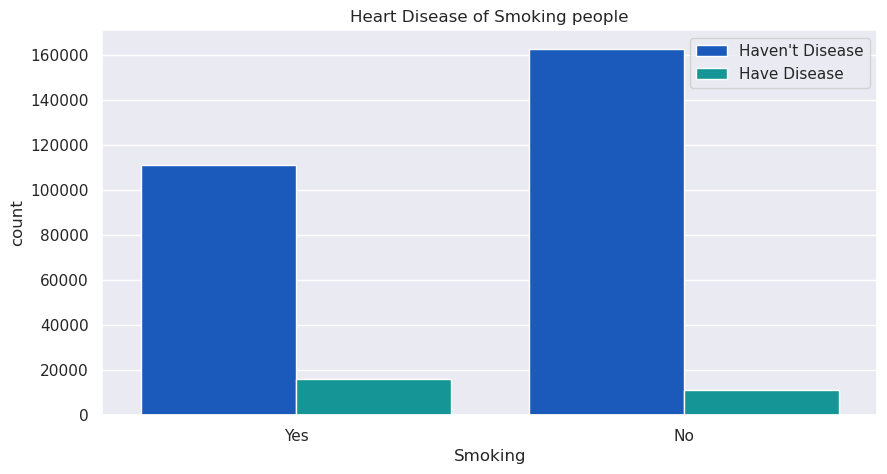

In [23]:
#show Heart Disease Frequency for Smoking
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=df,hue='HeartDisease',palette='winter')
plt.title('Heart Disease of Smoking people')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Smoking')
plt.show()

In [24]:
# I want to Know how many people drink the AlcoholDrinking or not 
df['AlcoholDrinking'].value_counts()

No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64

In [25]:
df.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()

AlcoholDrinking  HeartDisease
No               No              254016
                 Yes              26120
Yes              No               20440
                 Yes               1141
Name: HeartDisease, dtype: int64

In [26]:
df.groupby(['Sex','AgeCategory','AlcoholDrinking','PhysicalActivity','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  AlcoholDrinking  PhysicalActivity  HeartDisease
Female  18-24        No               No                No              1419
                                                        Yes                9
                                      Yes               No              6942
                                                        Yes               38
                     Yes              No                No                66
                                                                        ... 
Male    80 or older  No               Yes               Yes             1780
                     Yes              No                No                59
                                                        Yes               34
                                      Yes               No               127
                                                        Yes               41
Name: HeartDisease, Length: 208, dtype: int64

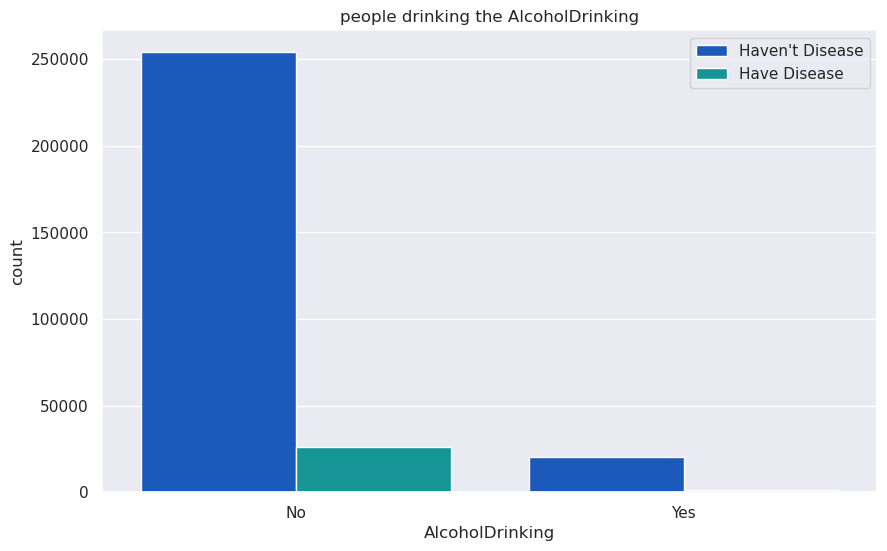

In [27]:
#Show how many people drink the AlcoholDrinking or not 
plt.figure(figsize=(10,6))
sns.countplot(x=df['AlcoholDrinking'],data=df , hue='HeartDisease',palette='winter')
plt.title('people drinking the AlcoholDrinking')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('AlcoholDrinking')
plt.show()

In [28]:
#I want to know how many people have KidneyDisease
df['KidneyDisease'].value_counts()

No     289941
Yes     11776
Name: KidneyDisease, dtype: int64

In [29]:
#show the peolple who have KidneyDisease and HeartDisease
df.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()

KidneyDisease  HeartDisease
No             No              266134
               Yes              23807
Yes            No                8322
               Yes               3454
Name: HeartDisease, dtype: int64

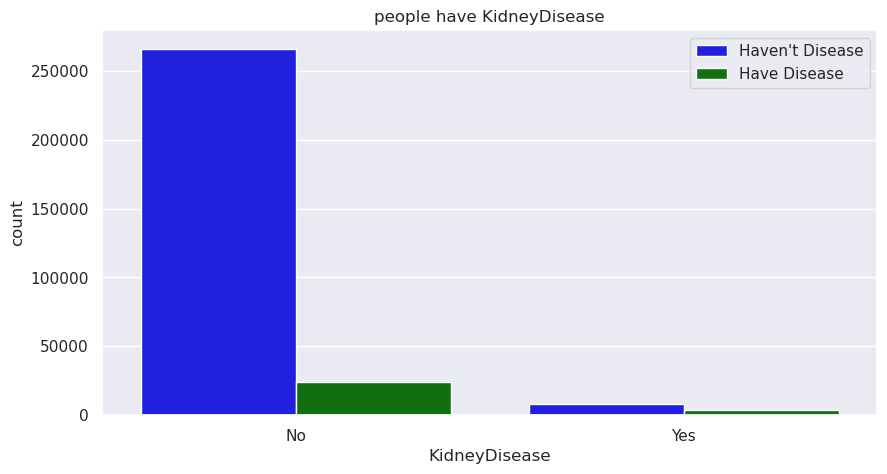

In [30]:
plt.figure(figsize=(10,5))
sns.countplot( x = 'KidneyDisease', data=df, hue='HeartDisease',palette=['blue','green'])
plt.title('people have KidneyDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

In [31]:
df.groupby(['Sex','KidneyDisease'])['KidneyDisease'].count()

Sex     KidneyDisease
Female  No               153218
        Yes                6453
Male    No               136723
        Yes                5323
Name: KidneyDisease, dtype: int64

In [32]:
#Show the SkinCancer  
df['SkinCancer'].value_counts()

No     272425
Yes     29292
Name: SkinCancer, dtype: int64

In [33]:
#Show people have SkinCancer
df.groupby(['Sex','SkinCancer'])['SkinCancer'].count()

Sex     SkinCancer
Female  No            144876
        Yes            14795
Male    No            127549
        Yes            14497
Name: SkinCancer, dtype: int64

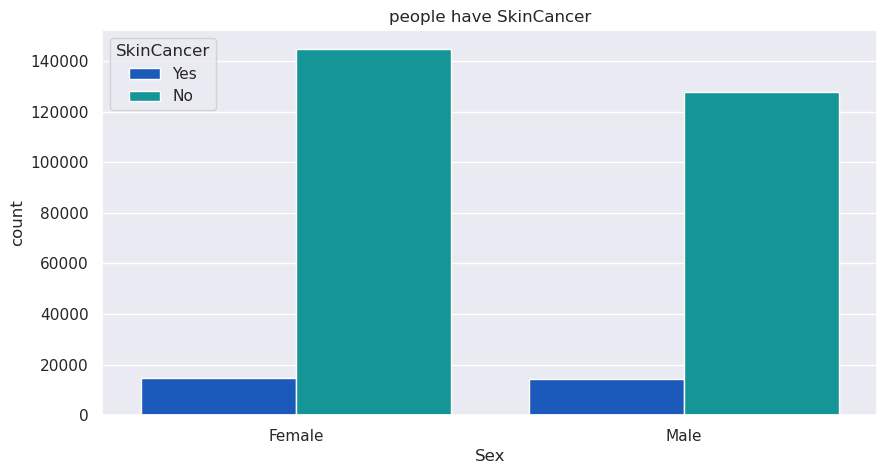

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',data=df, hue='SkinCancer',palette='winter')
plt.title('people have SkinCancer')
plt.show()

In [35]:
df.groupby(['Sex','SkinCancer','HeartDisease'])['HeartDisease'].count()

Sex     SkinCancer  HeartDisease
Female  No          No              135339
                    Yes               9537
        Yes         No               13119
                    Yes               1676
Male    No          No              114793
                    Yes              12756
        Yes         No               11205
                    Yes               3292
Name: HeartDisease, dtype: int64

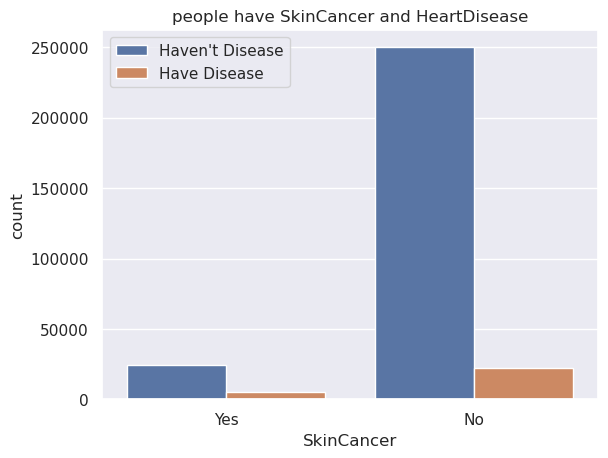

In [36]:
sns.countplot(x = 'SkinCancer', data=df , hue = 'HeartDisease')
plt.title('people have SkinCancer and HeartDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

# Check the Distribution and skewness of the features

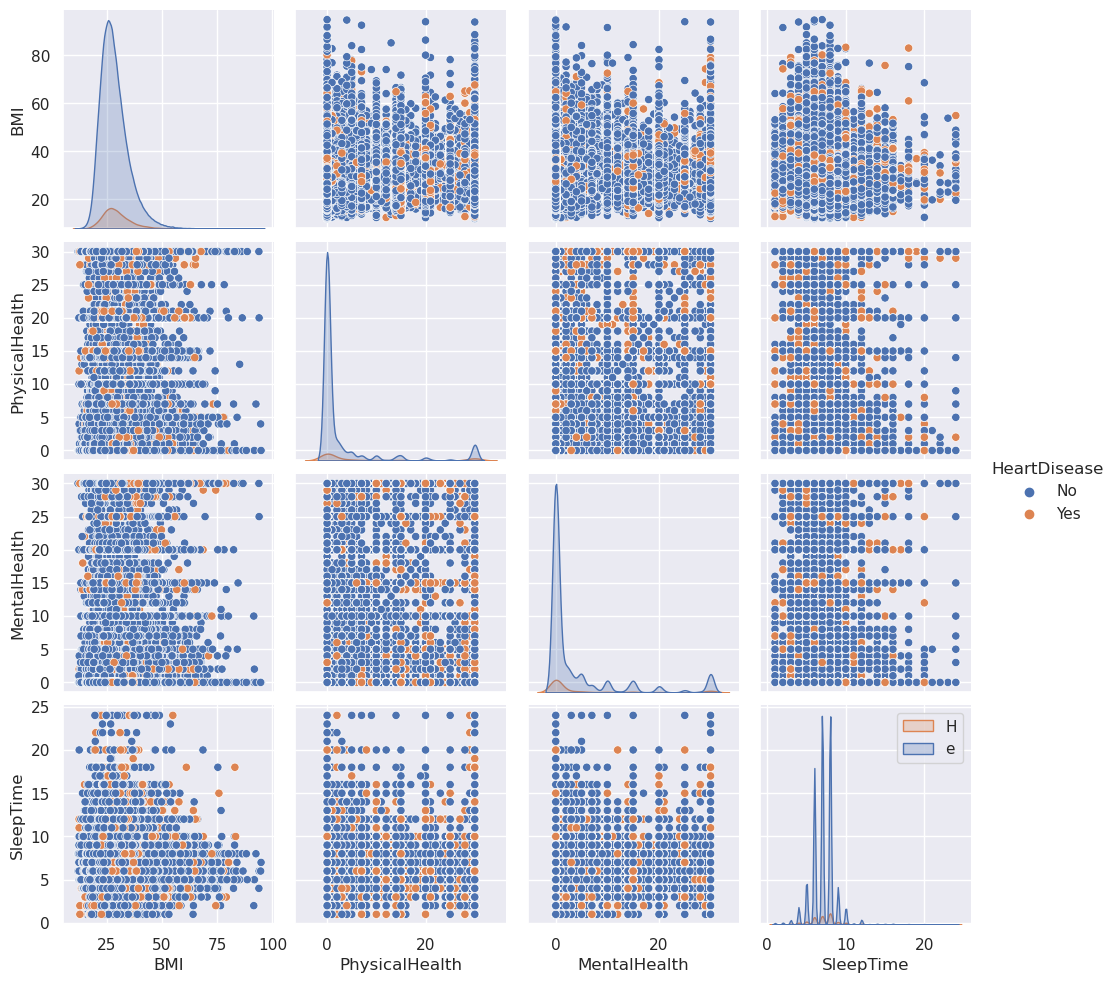

In [37]:
sns.pairplot(data = df , hue= 'HeartDisease')
plt.legend('HeartDisease')

In [38]:
label=LabelEncoder()
for col in df:
    df[col]=label.fit_transform(df[col])
df 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1180,1,0,0,7,0,1,1,8,3,2,0,1,5,1,0,0
319791,0,1397,1,0,0,0,0,0,1,3,3,0,1,4,4,1,0,0
319792,0,886,0,0,0,0,0,0,0,5,3,0,1,2,5,0,0,0
319793,0,1658,0,0,0,0,0,0,0,1,3,0,0,2,11,0,0,0


In [39]:
x = df.drop('HeartDisease',axis=1)
y = df[['HeartDisease']]

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70,random_state=42) 

In [41]:
Clf = DecisionTreeClassifier() 

In [42]:
Clf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [43]:
Clf.score(xtest,ytest) # after sampling

0.8535065623757125

In [44]:
Clf.score(x,y) 

0.9543214336613449

# Over Sampling

In [45]:
over = RandomOverSampler(random_state=42)

In [46]:
x_new , y_new = over.fit_resample(x,y)

# Hold Out Cross Validation

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.70,random_state=42) 

In [48]:
dt = DecisionTreeClassifier() 

In [49]:
dt.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [50]:
dt.score(xtest,ytest) # after sampling

0.9482857038755359

In [51]:
dt.score(xtrain,ytrain) # after sampling

0.9979361749748854

# Without sampling¶

In [52]:
x.shape

(301717, 17)

In [53]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.75,random_state=42) 

In [54]:
dt.fit(xtrain1, ytrain1) 

DecisionTreeClassifier()

In [55]:
dt.score(xtest1,ytest1) # imbalanced old data

0.8524062044279465

# Random Forest

In [56]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)


/tmp/ipykernel_23/307019015.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain, ytrain)


Training accuracy: 0.9979361749748854
Testing accuracy: 0.9642748703499034


In [57]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.7854194535678408
Testing accuracy: 0.779206189198052


# K Fold Cross Validation

In [58]:
kfold = KFold(n_splits=5, shuffle=True) #each fold contain 25% data

In [59]:
result = cross_val_score(rf, x_new, y_new, cv=kfold) 

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [60]:
result

array([0.96903892, 0.96872922, 0.96738081, 0.96784537, 0.96806398])

In [61]:
result.mean()

0.9682116598929831

In [62]:
result.max()

0.9690389222375049

In [63]:
result.min()

0.9673808092401305

# dimantionally reduction using pca

In [64]:
mmx = MinMaxScaler()

In [65]:
scaled_x = mmx.fit_transform(x_new)

In [66]:
scaled_x.shape

(548912, 17)

In [67]:
scaled_x

array([[0.06189287, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.14543436, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30613378, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.18262559, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19816819, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.3719123 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#  PCA

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)

In [69]:
x_pca

array([[ 0.24442704,  0.14143944, -0.7983402 ],
       [-0.43077601,  0.57819074, -0.08577629],
       [ 0.35480924, -0.54707191, -0.18678547],
       ...,
       [-0.16469295,  0.01309679, -0.88049607],
       [-0.08603495, -0.84414536, -0.11336072],
       [-0.69422652, -0.19403481,  0.42689742]])

In [70]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3'])

In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(features, y_new, train_size=.70,random_state=42) 

In [72]:
xtrain

,pca1,pca2,pca3
78195,-0.649463,0.629905,-0.155955
17062,-0.574118,0.616438,-0.153977
158180,-0.664720,0.648244,-0.147170
333159,-0.189691,-0.754458,-0.204570
357122,-0.319674,-0.721703,-0.269129
...,...,...,...
110268,-0.693385,-0.194329,0.433002
259178,0.488367,0.354290,-0.658023
365838,1.238293,-0.490379,0.427167
131932,0.817257,0.990870,0.346796


# Linear SGDClassifier

In [73]:
from sklearn.linear_model import SGDClassifier
# Create an instance of SGDClassifier
lsgd = SGDClassifier()

# Fit the model to the training data
lsgd.fit(xtrain, ytrain)

# Evaluate the model on the testing data
testing_score = lsgd.score(xtest, ytest)
print("Testing score:", testing_score)

# Evaluate the model on the training data
training_score = lsgd.score(xtrain, ytrain)
print("Training score:", training_score)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing score: 0.6648772726720672
Training score: 0.6654235135514968


# KNeighborsClassifier

In [74]:
# Create a KNN classifier object with 100 neighbors
knn = KNeighborsClassifier(n_neighbors=100)

# Train the classifier using the training data
knn.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
testing_score= knn.score(xtest, ytest)  # testing
print("Testing score:", testing_score)

# Calculate the accuracy score on the training data
training_score= knn.score(xtrain, ytrain)  # training
print("Training score:", training_score)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Testing score: 0.7491528717344572
Training score: 0.7540508747182736


# XGBClassifier

In [75]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.7637974380462109
Testing accuracy: 0.756895441903397


# RandomForestClassifier

In [76]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)

/tmp/ipykernel_23/4038136945.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain, ytrain)


Training accuracy: 0.9979309698676341
Testing accuracy: 0.960443057191785


# ExtraTreesClassifier

In [77]:
# Create an instance of the ExtraTreesClassifier
extr = ExtraTreesClassifier()

# Fit the model to the training data
extr.fit(xtrain, ytrain)

# Evaluate the model on the testing data
test_score = extr.score(xtest, ytest)
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score = extr.score(xtrain, ytrain)
print("Training Score:", train_score)

/tmp/ipykernel_23/869277602.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extr.fit(xtrain, ytrain)


Testing Score: 0.9754970426418257
Training Score: 0.9979361749748854


# DecisionTreeClassifier

In [78]:
# Create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier() 

# Fit the model to the training data
dt.fit(xtrain,ytrain)

# Evaluate the model on the testing data
test_score= dt.score(xtest,ytest) # after sampling
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score= dt.score(xtrain,ytrain) # after sampling
print("Training Score:", train_score)

Testing Score: 0.9474841201403986
Training Score: 0.9979361749748854


# LogisticRegression

In [79]:
# Create a Logistic Regression model
lg = LogisticRegression()

# Train the model on the training data
lg.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
test_score = lg.score(xtest, ytest)
print("Testing Score:", test_score)
# Calculate the accuracy score on the training data
train_score = lg.score(xtrain, ytrain)
print("Training Score:", train_score)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Score: 0.6819595078761674
Training Score: 0.6820017801466799


# Support Vector Machine (SVM)

In [80]:
'''#take huge time thats why its stoped 

from sklearn import svm
from sklearn.svm import SVC
# Create an instance of SVM classifier with linear kernel
sv = SVC(kernel='linear')

# Train the classifier using the training data
sv.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score= sv.score(xtrain, ytrain)
print("Training Score:", train_score)

# Calculate the accuracy score on the testing data
test_score= sv.score(xtest, ytest)
print("Testing Score:", test_score)'''

'#take huge time thats why its stoped \n\nfrom sklearn import svm\nfrom sklearn.svm import SVC\n# Create an instance of SVM classifier with linear kernel\nsv = SVC(kernel=\'linear\')\n\n# Train the classifier using the training data\nsv.fit(xtrain, ytrain)\n\n# Calculate the accuracy score on the training data\ntrain_score= sv.score(xtrain, ytrain)\nprint("Training Score:", train_score)\n\n# Calculate the accuracy score on the testing data\ntest_score= sv.score(xtest, ytest)\nprint("Testing Score:", test_score)'

# classification model

In [81]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Initialize and train classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'XGBClassifier': XGBClassifier()
    #'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    # Train the model
    model.fit(xtrain, ytrain)

    # Make predictions
    y_pred = model.predict(xtest)

    # Evaluate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')


Decision Tree Accuracy: 0.9484


/tmp/ipykernel_23/1664603529.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


Random Forest Accuracy: 0.9643


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 0.7465


/tmp/ipykernel_23/1664603529.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


ExtraTreesClassifier Accuracy: 0.9719
XGBClassifier Accuracy: 0.7792


# Ensemble 

In [82]:
# Bagging
bagging_model = RandomForestClassifier(n_estimators=10, random_state=42)
bagging_model.fit(xtrain, ytrain)
bagging_pred = bagging_model.predict(xtest)
print("Bagging Accuracy:", accuracy_score(ytest, bagging_pred))

# Boosting
boosting_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42)
boosting_model.fit(xtrain, ytrain)
boosting_pred = boosting_model.predict(xtest)
print("Boosting Accuracy:", accuracy_score(ytest, boosting_pred))

# Stacking
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('logistic_regression', LogisticRegression())
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(xtrain, ytrain)
stacking_pred = stacking_model.predict(xtest)
print("Stacking Accuracy:", accuracy_score(ytest, stacking_pred))


/tmp/ipykernel_23/922613987.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  bagging_model.fit(xtrain, ytrain)


Bagging Accuracy: 0.9640016031674703
0:	learn: 0.6660496	total: 120ms	remaining: 11.9s
1:	learn: 0.6438644	total: 173ms	remaining: 8.48s
2:	learn: 0.6242326	total: 224ms	remaining: 7.25s
3:	learn: 0.6082930	total: 274ms	remaining: 6.58s
4:	learn: 0.5948690	total: 329ms	remaining: 6.25s
5:	learn: 0.5832117	total: 383ms	remaining: 6s
6:	learn: 0.5731179	total: 436ms	remaining: 5.79s
7:	learn: 0.5641725	total: 489ms	remaining: 5.63s
8:	learn: 0.5566621	total: 546ms	remaining: 5.52s
9:	learn: 0.5495321	total: 600ms	remaining: 5.4s
10:	learn: 0.5431592	total: 655ms	remaining: 5.3s
11:	learn: 0.5379904	total: 708ms	remaining: 5.19s
12:	learn: 0.5331779	total: 765ms	remaining: 5.12s
13:	learn: 0.5291321	total: 818ms	remaining: 5.02s
14:	learn: 0.5255276	total: 870ms	remaining: 4.93s
15:	learn: 0.5221511	total: 921ms	remaining: 4.83s
16:	learn: 0.5194906	total: 978ms	remaining: 4.78s
17:	learn: 0.5166814	total: 1.03s	remaining: 4.7s
18:	learn: 0.5145589	total: 1.08s	remaining: 4.62s
19:	learn:

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Stacking Accuracy: 0.9482006874187789


# Modeling

In [83]:
def evaluate_model(model, xtest, ytest):
   
    # Predict Test Data 
    ypred = model.predict(xtest)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(ytest, ypred)
    prec = metrics.precision_score(ytest, ypred)
    rec = metrics.recall_score(ytest, ypred)
    f1 = metrics.f1_score(ytest, ypred)
    kappa = metrics.cohen_kappa_score(ytest, ypred)

    # Calculate area under curve (AUC)
    ypred_proba = model.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, ypred_proba)
    auc = metrics.roc_auc_score(ytest, ypred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(ytest, ypred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [84]:
xtrain

array([[-0.76049382, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [ 0.64561895, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [-0.86879755, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       ...,
       [ 0.63460502,  1.00900373, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [-0.05193047, -0.99107662, -0.249487  , ...,  2.30361331,
        -0.29095031, -0.39599276],
       [-1.27814892, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276]])

In [85]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(xtrain, ytrain)


# Evaluate Model
knn_eval = evaluate_model(knn, xtest, ytest)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8785054106902122
Precision: 0.8107060507275184
Recall: 0.9883558905138675
F1 Score: 0.8907598814067389
Cohens Kappa Score: 0.7568836532620027
Area Under Curve: 0.9410232611073517
Confusion Matrix:
 [[63097 19046]
 [  961 81570]]


In [86]:
# Building a model using KNeighborsClassifier 
rf1 = RandomForestClassifier()

rf1.fit(xtrain, ytrain)

# Evaluate Model
rf1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', rf1_eval['acc'])
print('Precision:', rf1_eval['prec'])
print('Recall:', rf1_eval['rec'])
print('F1 Score:', rf1_eval['f1'])
print('Cohens Kappa Score:', rf1_eval['kappa'])
print('Area Under Curve:', rf1_eval['auc'])
print('Confusion Matrix:\n', rf1_eval['cm'])

/tmp/ipykernel_23/783377244.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(xtrain, ytrain)


Accuracy: 0.9640441113958488
Precision: 0.933775734378185
Recall: 0.9991154838787849
F1 Score: 0.9653412317003928
Cohens Kappa Score: 0.9280759374443315
Area Under Curve: 0.9965533788031816
Confusion Matrix:
 [[76295  5848]
 [   73 82458]]


In [87]:
# Building a model using KNeighborsClassifier 
extra = ExtraTreesClassifier()

extra.fit(xtrain, ytrain)


# Evaluate Model
extra_eval = evaluate_model(extra, xtest, ytest)

# Print result
print('Accuracy:', extra_eval['acc'])
print('Precision:', extra_eval['prec'])
print('Recall:', extra_eval['rec'])
print('F1 Score:', extra_eval['f1'])
print('Cohens Kappa Score:', extra_eval['kappa'])
print('Area Under Curve:', extra_eval['auc'])
print('Confusion Matrix:\n', extra_eval['cm'])

/tmp/ipykernel_23/696800089.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra.fit(xtrain, ytrain)


Accuracy: 0.9717502459404642
Precision: 0.9474004710748549
Recall: 0.9991033672195903
F1 Score: 0.9725652548270289
Cohens Kappa Score: 0.9434928951329158
Area Under Curve: 0.9971070019173197
Confusion Matrix:
 [[77565  4578]
 [   74 82457]]


In [88]:
# Building a model using KNeighborsClassifier 
xgb = XGBClassifier()

xgb.fit(xtrain, ytrain)


# Evaluate Model
xgb_eval = evaluate_model(xgb, xtest, ytest)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.7792001165939978
Precision: 0.757228653882581
Recall: 0.8234360422144407
F1 Score: 0.7889457736913593
Cohens Kappa Score: 0.5583065739122526
Area Under Curve: 0.8597192882675952
Confusion Matrix:
 [[60355 21788]
 [14572 67959]]


In [89]:
# Building a model using KNeighborsClassifier 
dt1= DecisionTreeClassifier(random_state=0)
dt1.fit(xtrain, ytrain)


# Evaluate Model
dt1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', dt1_eval['acc'])
print('Precision:', dt1_eval['prec'])
print('Recall:', dt1_eval['rec'])
print('F1 Score:', dt1_eval['f1'])
print('Cohens Kappa Score:', dt1_eval['kappa'])
print('Area Under Curve:', dt1_eval['auc'])
print('Confusion Matrix:\n', dt1_eval['cm'])

Accuracy: 0.9640441113958488
Precision: 0.933775734378185
Recall: 0.9991154838787849
F1 Score: 0.9653412317003928
Cohens Kappa Score: 0.9280759374443315
Area Under Curve: 0.9965533788031816
Confusion Matrix:
 [[76295  5848]
 [   73 82458]]


In [90]:
# took much more time thats why its stoped
'''from sklearn.svm import SVC
# Building a model using KNeighborsClassifier 
sv = SVC(kernel='linear')

sv.fit(xtrain, ytrain)


# Evaluate Model
sv_eval = evaluate_model(sv, xtest, ytest)

# Print result
print('Accuracy:', sv_eval['acc'])
print('Precision:', sv_eval['prec'])
print('Recall:', sv_eval['rec'])
print('F1 Score:', sv_eval['f1'])
print('Cohens Kappa Score:', sv_eval['kappa'])
print('Area Under Curve:', sv_eval['auc'])
print('Confusion Matrix:\n', sv_eval['cm'])'''

"from sklearn.svm import SVC\n# Building a model using KNeighborsClassifier \nsv = SVC(kernel='linear')\n\nsv.fit(xtrain, ytrain)\n\n\n# Evaluate Model\nsv_eval = evaluate_model(sv, xtest, ytest)\n\n# Print result\nprint('Accuracy:', sv_eval['acc'])\nprint('Precision:', sv_eval['prec'])\nprint('Recall:', sv_eval['rec'])\nprint('F1 Score:', sv_eval['f1'])\nprint('Cohens Kappa Score:', sv_eval['kappa'])\nprint('Area Under Curve:', sv_eval['auc'])\nprint('Confusion Matrix:\n', sv_eval['cm'])"

In [91]:

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Define the individual models
model1 = DecisionTreeClassifier(random_state=42)
model2 = RandomForestClassifier()
model3 = ExtraTreesClassifier()

# Create the VotingClassifier ensemble
ensemble = VotingClassifier(
    estimators=[('dt1', model1),('rf1', model2),('extra', model3) ],
    voting='hard'  # You can also use 'soft' voting
)

# Train the ensemble model
ensemble.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = ensemble.predict(xtest)
print("y_prediction:", y_pred)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


y_prediction: [1 1 0 ... 1 1 0]
Accuracy: 0.9691936796337005


# save ai model

In [92]:
import pickle

In [93]:
pickle.dump(extra, open('Heart Disease Prediction','wb'))

In [94]:
reg = pickle.load(open('Heart Disease Prediction', 'rb'))